# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [8]:
!pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 17.4 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [115]:
## Decision Trees sample code:

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

def encode_categorical(df):
    
    categorical_vars = list(df.select_dtypes(['object']).columns)
    
    data = []
    for var in categorical_vars:
        one_hot_encoder = LabelBinarizer()
        oh = one_hot_encoder.fit_transform(df[var]) # One-hot encode the 'bird' variable
        names = [f"{var}-{class_name}" for class_name in one_hot_encoder.classes_] # Get names of the classes
        print(f"{var}: {names}")
        if len(names)<=2:
            names = ["is_" + names[0]]
        var_df = pd.DataFrame(data = oh, columns = names)
        data.append(var_df)
    
    #print(data)
    
    categorical_df = pd.concat(data, axis=1)
    df = pd.concat([df[[c for c in df.columns if c not in categorical_vars]], categorical_df], axis=1)
    
    return df

def fit_model(X_train, y_train, max_depth=10):
    model = tree.DecisionTreeRegressor(max_depth=max_depth) # Fit the classifier
    tree_model = model.fit(X_train, y_train)
    #tree.plot_tree(cart,filled=True) 
    #plt.show()
    
    return tree_model

def predict(model, X_test, y_test):
    ## Make Predictions on the Test Set
    y_hat = model.predict(X_test)
    residuals = y_test - y_hat

    ## Residual plot:
    sns.kdeplot(residuals)
    plt.show()

    ## True versus predicted plot:
    plt.scatter(x=y_hat,y=y_test)
    plt.title('Predicted vs. Actual Values')
    plt.show()

def calculate_metrics(y_test, y_hat, TSS, N_test):
    ## Metrics:
    SSE = np.sum( (y_test-y_hat)**2 )
    MSE = (1/N_test)*np.sum( (y_test-y_hat)**2 )
    RMSE = (SSE/N_test)**(1/2)
    R2 = 1 - SSE/TSS
    
    print(f"SSE: {SSE}")
    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")
    print(f"R2: {R2}")
    
    return RMSE, R2

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

__ANSWERS:__

1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [66]:
df = pd.read_csv('./data/cars_hw.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


In [68]:
df_cleaned = encode_categorical(df)

Make: ['Make-Chevrolet', 'Make-Datsun', 'Make-Ford', 'Make-Honda', 'Make-Hyundai', 'Make-Jeep', 'Make-Kia', 'Make-MG Motors', 'Make-Mahindra', 'Make-Maruti Suzuki', 'Make-Nissan', 'Make-Renault', 'Make-Skoda', 'Make-Tata', 'Make-Toyota', 'Make-Volkswagen']
Color: ['Color-beige', 'Color-black', 'Color-blue', 'Color-bronze', 'Color-brown', 'Color-golden', 'Color-green', 'Color-grey', 'Color-maroon', 'Color-orange', 'Color-purple', 'Color-red', 'Color-silver', 'Color-white', 'Color-yellow']
Body_Type: ['Body_Type-crossover', 'Body_Type-hatchback', 'Body_Type-muv', 'Body_Type-sedan', 'Body_Type-suv']
No_of_Owners: ['No_of_Owners-1st', 'No_of_Owners-2nd', 'No_of_Owners-3rd']
Fuel_Type: ['Fuel_Type-diesel', 'Fuel_Type-petrol', 'Fuel_Type-petrol+cng']
Transmission: ['Transmission-4-Speed', 'Transmission-5-Speed', 'Transmission-6-Speed', 'Transmission-7-Speed', 'Transmission-CVT']
Transmission_Type: ['Transmission_Type-Automatic', 'Transmission_Type-Manual']


In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Unnamed: 0                      976 non-null    int64
 1   Make_Year                       976 non-null    int64
 2   Mileage_Run                     976 non-null    int64
 3   Seating_Capacity                976 non-null    int64
 4   Price                           976 non-null    int64
 5   Make-Chevrolet                  976 non-null    int32
 6   Make-Datsun                     976 non-null    int32
 7   Make-Ford                       976 non-null    int32
 8   Make-Honda                      976 non-null    int32
 9   Make-Hyundai                    976 non-null    int32
 10  Make-Jeep                       976 non-null    int32
 11  Make-Kia                        976 non-null    int32
 12  Make-MG Motors                  976 non-null    int32
 13  Make-

In [70]:
df_cleaned.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price,Make-Chevrolet,Make-Datsun,Make-Ford,Make-Honda,Make-Hyundai,...,No_of_Owners-3rd,Fuel_Type-diesel,Fuel_Type-petrol,Fuel_Type-petrol+cng,Transmission-4-Speed,Transmission-5-Speed,Transmission-6-Speed,Transmission-7-Speed,Transmission-CVT,is_Transmission_Type-Automatic
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02,976.000000,976.000000,976.000000,976.000000,976.00000,...,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05,0.006148,0.003074,0.053279,0.074795,0.31250,...,0.004098,0.195697,0.802254,0.002049,0.039959,0.767418,0.173156,0.016393,0.003074,0.729508
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05,0.078205,0.055385,0.224704,0.263195,0.46375,...,0.063920,0.396939,0.398504,0.045245,0.195963,0.422695,0.378576,0.127048,0.055385,0.444442
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [76]:
df[['Price']].describe()

,Price
count,9.760000e+02
mean,7.410195e+05
std,3.673234e+05
min,1.880000e+05
25%,4.757500e+05
50%,6.665000e+05
75%,8.830000e+05
max,2.941000e+06


<AxesSubplot:xlabel='Price', ylabel='Density'>

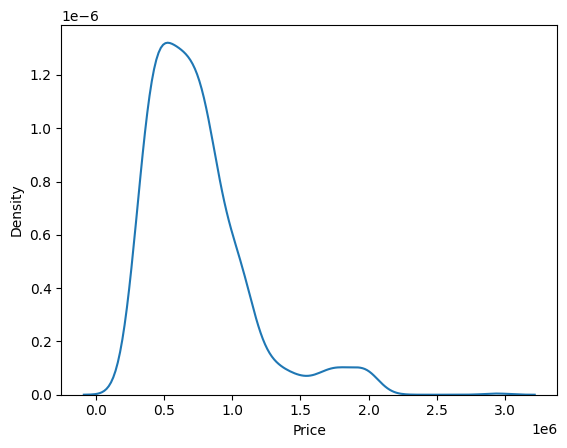

In [79]:
sns.kdeplot(data=df, x='Price')

In [78]:
df.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


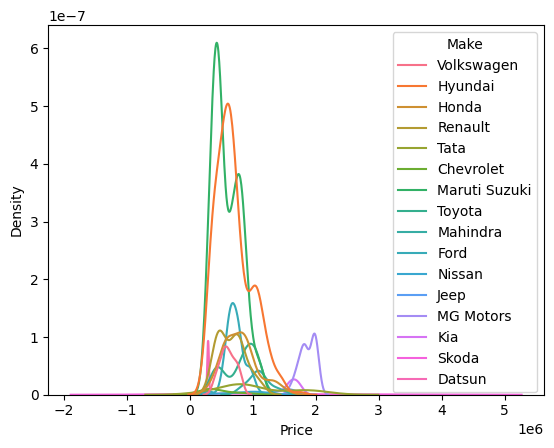

In [73]:
plot = sns.kdeplot(data=df, x='Price', hue="Make")

3. Split the data into an 80% training set and a 20% testing set.

In [80]:
from sklearn.model_selection import train_test_split
X = df_cleaned[[c for c in df_cleaned.columns if c!="Price"]]
y = df_cleaned[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [82]:
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [88]:
# Linear Model (Numeric Only)
from sklearn.linear_model import LinearRegression

numeric_columns = [c for c in df.columns if c not in set(df.select_dtypes(['object']).columns) and c!="Price"]
X_lin_train = X_train[numeric_columns]
X_lin_test = X_test[numeric_columns]

reg = LinearRegression().fit(X_lin_train, y_train)
y_hat = reg.predict(X_lin_test)
calculate_metrics(y_test, y_hat, TSS, N_test)

SSE: Price    2.018910e+13
dtype: float64
MSE: Price    1.030056e+11
dtype: float64
RMSE: Price    320944.882388
dtype: float64
R2: Price    0.259461
dtype: float64


In [89]:
# One-Hot Encoding Model

nonnumeric_columns = [c for c in X_train.columns if c not in numeric_columns and c!="Price"]
X_cat_train = X_train[nonnumeric_columns]
X_cat_test = X_test[nonnumeric_columns]

reg = LinearRegression().fit(X_cat_train, y_train)
y_hat = reg.predict(X_cat_test)
calculate_metrics(y_test, y_hat, TSS, N_test)

SSE: Price    1.075088e+13
dtype: float64
MSE: Price    5.485141e+10
dtype: float64
RMSE: Price    234203.784105
dtype: float64
R2: Price    0.605656
dtype: float64


In [123]:
# Combined Encoding Model

reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
calculate_metrics(y_test, y_hat, TSS, N_test)

SSE: Price    7.114465e+12
dtype: float64
MSE: Price    3.629829e+10
dtype: float64
RMSE: Price    190521.107298
dtype: float64
R2: Price    0.739041
dtype: float64


(Price    190521.107298
 dtype: float64,
 Price    0.739041
 dtype: float64)

The one-hot encoding linear regression model gives a higher R2 score (showing stronger linear correlation) and a lower RMSE score than the numeric linear regression model. The combined model out-performs both by significant margins, increasing the R2 value to 0.74 and reducing the RMSE by over 40,000.

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

-----Degree: 1-----
SSE: Price    7.114465e+12
dtype: float64
MSE: Price    3.629829e+10
dtype: float64
RMSE: Price    190521.107298
dtype: float64
R2: Price    0.739041
dtype: float64
-----Degree: 2-----
SSE: Price    1.229262e+17
dtype: float64
MSE: Price    6.271746e+14
dtype: float64
RMSE: Price    2.504345e+07
dtype: float64
R2: Price   -4507.949656
dtype: float64
-----Degree: 3-----
SSE: Price    2.393708e+19
dtype: float64
MSE: Price    1.221280e+17
dtype: float64
RMSE: Price    3.494681e+08
dtype: float64
R2: Price   -878014.229854
dtype: float64
[(Price    190521.107298
dtype: float64, Price    0.739041
dtype: float64), (Price    2.504345e+07
dtype: float64, Price   -4507.949656
dtype: float64), (Price    3.494681e+08
dtype: float64, Price   -878014.229854
dtype: float64)]


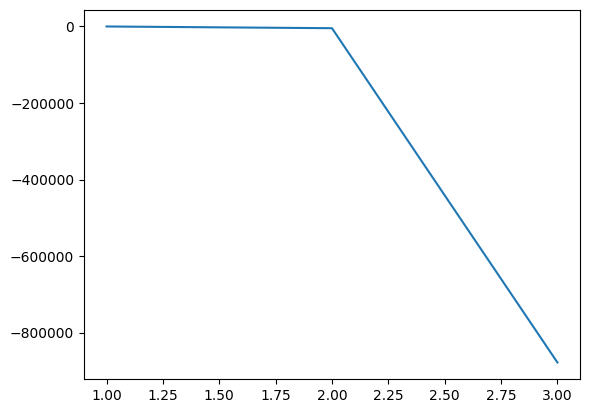

In [97]:
from sklearn.preprocessing import PolynomialFeatures

results = []
for deg in range(3):
    print(f"-----Degree: {deg+1}-----")
    expander = PolynomialFeatures(degree=deg+1,include_bias=False) # Create the expander

    Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

    Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

    reg = LinearRegression().fit(X_train_lm, y_train)
    y_hat = reg.predict(X_test_lm)
    RMSE, R2 = calculate_metrics(y_test, y_hat, TSS, N_test)
    results.append((RMSE, R2))
print(results)
plt.plot(range(1, 4), [r[1] for r in results], label="R2")

The R2 value goes negative at degree = 2. This means our best-performing model is actually the original model from before which had degree = 1.

 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [98]:
reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
calculate_metrics(y_test, y_hat, TSS, N_test)

SSE: Price    7.114465e+12
dtype: float64
MSE: Price    3.629829e+10
dtype: float64
RMSE: Price    190521.107298
dtype: float64
R2: Price    0.739041
dtype: float64


(Price    190521.107298
 dtype: float64,
 Price    0.739041
 dtype: float64)

Text(0.5, 0, 'True Values')

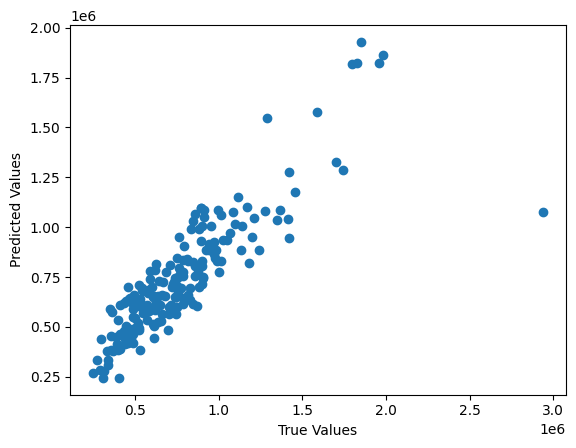

In [108]:
plt.scatter(y_test['Price'].tolist(), y_hat.tolist())
plt.ylabel("Predicted Values")
plt.xlabel("True Values")

For the most part, the values line up diagonally across the plot. However, there is a significant outlier to the right edge of the plot where a large true value is greatly underpredicted.

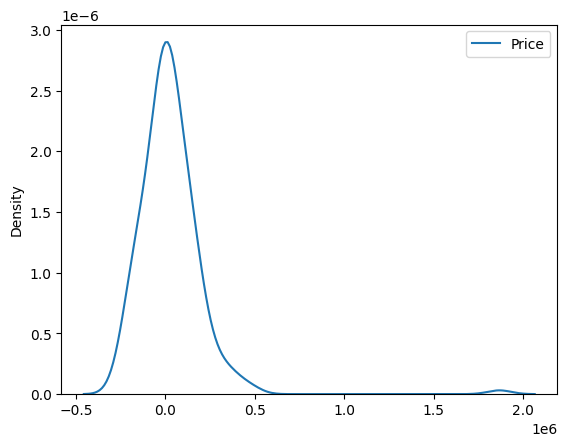

In [109]:
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.show()

Once again, excluding the outlier, the residuals look roughly bell-shaped around zero. A strength of the model is that it can adequately capture the linear relationships of the majority of the data points. A major weakness however is that it fails to extrapolate beyodn the bulk of the data it sees and thus cannot apply for more extreme values, resulting in the large residual for the large outlier price value.

  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

In [148]:
results = []

for depth in range(1, 20, 2):
    print(f"------Depth: {depth}------")
    tree_model = fit_model(X_train, y_train, max_depth=depth)
    y_hat = tree_model.predict(X_test)
    RMSE, R2 = calculate_metrics(y_test["Price"], y_hat, TSS, N_test)
    
    results.append((depth, RMSE, R2))

print(results)

------Depth: 1------
SSE: 20792071548850.156
MSE: 106081997698.21507
RMSE: 325702.3145423058
R2: Price    0.237344
dtype: float64
------Depth: 3------
SSE: 9856392776434.508
MSE: 50287718247.11483
RMSE: 224249.23243372503
R2: Price    0.638466
dtype: float64
------Depth: 5------
SSE: 8935362694701.51
MSE: 45588585177.048515
RMSE: 213514.83596473694
R2: Price    0.67225
dtype: float64
------Depth: 7------
SSE: 8789036036472.104
MSE: 44842020594.24542
RMSE: 211759.34594309036
R2: Price    0.677617
dtype: float64
------Depth: 9------
SSE: 8714384860934.493
MSE: 44461147249.66578
RMSE: 210858.12113756913
R2: Price    0.680355
dtype: float64
------Depth: 11------
SSE: 9010093755953.914
MSE: 45969866101.80568
RMSE: 214405.84437418138
R2: Price    0.669509
dtype: float64
------Depth: 13------
SSE: 8773081798390.69
MSE: 44760621420.360664
RMSE: 211567.06128403038
R2: Price    0.678202
dtype: float64
------Depth: 15------
SSE: 9337784657767.482
MSE: 47641758457.99735
RMSE: 218269.9211022842
R2:

The depth of 9 gives the best R2 score of 0.68 and the smallest RMSE of 210858.

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

Text(0.5, 0, 'True Values')

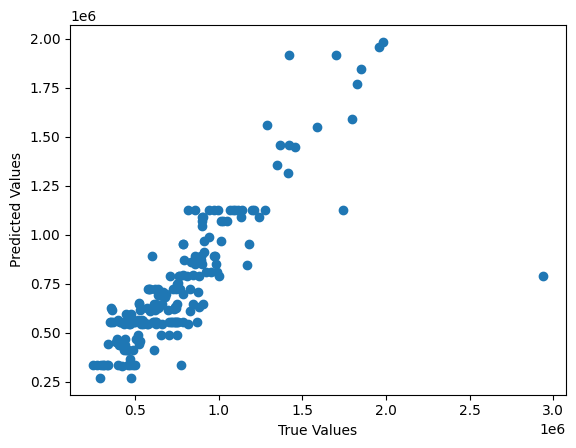

In [149]:
tree_model = fit_model(X_train, y_train, max_depth=9)
y_hat = tree_model.predict(X_test)
plt.scatter(y_test["Price"], y_hat)
plt.ylabel("Predicted Values")
plt.xlabel("True Values")

Excluding the same outlier we identified before, the values mostly line up along the diagonal, showing decent accuracy in the model's performance.

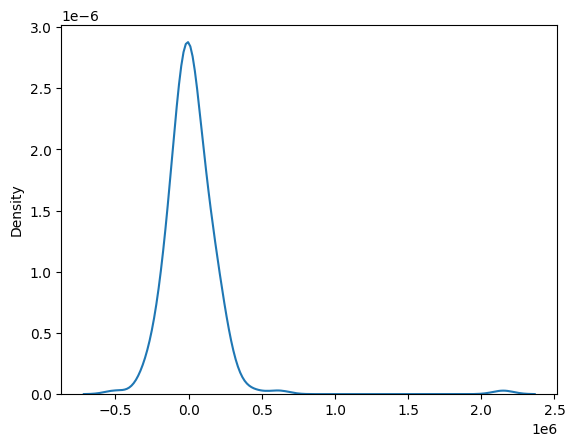

In [152]:
residuals = y_test["Price"].tolist() - y_hat
sns.kdeplot(residuals)
plt.show()

Like before, the values appear relatively bell-shaped excluding the large residual outlier to the right.

9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

Overall, the linear model actually exhibits better performance on the test set with a lower RMSE and a higher R2 value.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?